In [1]:
pip install ucimlrepo numpy pandas matplotlib scikit-learn seaborn autograd torch tabulate xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.8/253.8 MB 40.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 MB 28.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [ucimlrepo]/5 [xgboost]ccl-cu12]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
try:
    from ucimlrepo import fetch_ucirepo

    # fetch dataset
    support2 = fetch_ucirepo(id=880)

    # data (as pandas dataframes)
    X = support2.data.features
    y = support2.data.targets

    # metadata
    print(support2.metadata)

    # variable information
    print(support2.variables)
except ConnectionError as e:
    import pandas as pd
    print("Unable to fetch dataset. Trying to load from local file.")
    support2 = pd.read_csv("data.csv")
    X = support2.iloc[:,:-3]
    y = support2.iloc[:,-3:]

{'uci_id': 880, 'name': 'SUPPORT2', 'repository_url': 'https://archive.ics.uci.edu/dataset/880/support2', 'data_url': 'https://archive.ics.uci.edu/static/public/880/data.csv', 'abstract': "This dataset comprises 9105 individual critically ill patients across 5 United States medical centers, accessioned throughout 1989-1991 and 1992-1994.\nEach row concerns hospitalized patient records who met the inclusion and exclusion criteria for nine disease categories: acute respiratory failure, chronic obstructive pulmonary disease, congestive heart failure, liver disease, coma, colon cancer, lung cancer, multiple organ system failure with malignancy, and multiple organ system failure with sepsis. The goal is to determine these patients' 2- and 6-month survival rates based on several physiologic, demographics, and disease severity information. \nIt is an important problem because it addresses the growing national concern over patients' loss of control near the end of life. It enables earlier deci

In [3]:
# support2.variables.to_csv("support2_codebook.csv", index=False)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.concat([X,y],axis=1)
data

,age,sex,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,...,ph,glucose,bun,urine,adlp,adls,adlsc,death,hospdead,sfdm2
0,62.84998,male,Lung Cancer,Cancer,0,11.0,$11-$25k,0.0,9715.0,NaN,...,7.459961,NaN,NaN,NaN,7.0,7.0,7.000000,0,0,NaN
1,60.33899,female,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,$11-$25k,44.0,34496.0,NaN,...,7.250000,NaN,NaN,NaN,NaN,1.0,1.000000,1,1,<2 mo. follow-up
2,52.74698,female,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,under $11k,0.0,41094.0,NaN,...,7.459961,NaN,NaN,NaN,1.0,0.0,0.000000,1,0,<2 mo. follow-up
3,42.38498,female,Lung Cancer,Cancer,2,11.0,under $11k,0.0,3075.0,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,1,0,no(M2 and SIP pres)
4,79.88495,female,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,NaN,26.0,50127.0,NaN,...,7.509766,NaN,NaN,NaN,NaN,2.0,2.000000,0,0,no(M2 and SIP pres)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9100,66.07300,male,ARF/MOSF w/Sepsis,ARF/MOSF,1,8.0,NaN,0.0,52870.0,34329.3125,...,7.459961,188.0,21.0,NaN,NaN,0.0,0.000000,0,0,NaN
9101,55.15399,female,Coma,Coma,1,11.0,NaN,41.0,35377.0,23558.5000,...,7.289062,190.0,49.0,0.0,NaN,0.0,0.000000,0,0,NaN
9102,70.38196,male,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,NaN,0.0,46564.0,31409.0156,...,7.379883,189.0,60.0,3900.0,NaN,NaN,2.525391,0,0,NaN
9103,47.01999,male,MOSF w/Malig,ARF/MOSF,1,13.0,NaN,0.0,58439.0,NaN,...,7.469727,246.0,55.0,NaN,NaN,0.0,0.000000,1,1,<2 mo. follow-up


In [5]:
# missed_target_data = data[data['sfdm2'].isnull()]
# data = data.dropna(subset=['sfdm2'])

In [6]:
from tabulate import tabulate
def dataUnderstanding(data):
  # Number of the rows and columns
  rows, columns = data.shape
  print('-' * 50)
  print(f"Number of Rows:{rows} | Number of Columns:{columns}")
  print('-' * 50)
  print()

  # List of columns
  columns_df = pd.DataFrame(data.columns, columns=["Column Names"])
  print("List of Features in the dataset:")
  print(tabulate(columns_df, headers='keys', tablefmt='psql', showindex=False))
  print('-' * 50)
  print()

  # Print Data type
  print("Summarized basic information:\n")
  data.info()
  print('-' * 50)
  print()

  # printing all the numerical datatype columns
  numerical_columns = data.select_dtypes(include=['number']).columns.tolist()
  print(f"Printing all the numerical columns --> {numerical_columns}")
  print()
  # printing all the object datatype columns
  object_columns = data.select_dtypes(include=['object']).columns.tolist()
  print(f"Printing all the Object columns --> {object_columns}")
  print('-' * 50)
  print()

  # finding the missing values
  print(f"Finding the number of missing values in all the columns -->\n")
  print(data.isna().sum())
  print('-' * 50)


dataUnderstanding(data)

--------------------------------------------------
Number of Rows:9105 | Number of Columns:45
--------------------------------------------------

List of Features in the dataset:
+----------------+
| Column Names   |
|----------------|
| age            |
| sex            |
| dzgroup        |
| dzclass        |
| num.co         |
| edu            |
| income         |
| scoma          |
| charges        |
| totcst         |
| totmcst        |
| avtisst        |
| race           |
| sps            |
| aps            |
| surv2m         |
| surv6m         |
| hday           |
| diabetes       |
| dementia       |
| ca             |
| prg2m          |
| prg6m          |
| dnr            |
| dnrday         |
| meanbp         |
| wblc           |
| hrt            |
| resp           |
| temp           |
| pafi           |
| alb            |
| bili           |
| crea           |
| sod            |
| ph             |
| glucose        |
| bun            |
| urine          |
| adlp           |
| ad

# Data Preprocessing

## Data Cleaning

### Missing Values

In [7]:
missing_value_table = data.isnull().sum()
missing_value_proportion = missing_value_table[missing_value_table>0].sort_values(ascending=False) / len(data)
for i in missing_value_proportion.index:
    print("{}: {:.2f}%".format(i,missing_value_proportion[i]*100), f'dtype={data[i].dtype}')

adlp: 61.95% dtype=float64
urine: 53.40% dtype=float64
glucose: 49.42% dtype=float64
bun: 47.80% dtype=float64
totmcst: 38.17% dtype=float64
alb: 37.03% dtype=float64
income: 32.75% dtype=object
adls: 31.49% dtype=float64
bili: 28.57% dtype=float64
pafi: 25.54% dtype=float64
ph: 25.09% dtype=float64
prg2m: 18.11% dtype=float64
edu: 17.95% dtype=float64
prg6m: 17.94% dtype=float64
sfdm2: 15.38% dtype=object
totcst: 9.75% dtype=float64
wblc: 2.33% dtype=float64
charges: 1.89% dtype=float64
avtisst: 0.90% dtype=float64
crea: 0.74% dtype=float64
race: 0.46% dtype=object
dnrday: 0.33% dtype=float64
dnr: 0.33% dtype=object
scoma: 0.01% dtype=float64
sps: 0.01% dtype=float64
meanbp: 0.01% dtype=float64
aps: 0.01% dtype=float64
surv2m: 0.01% dtype=float64
surv6m: 0.01% dtype=float64
resp: 0.01% dtype=float64
hrt: 0.01% dtype=float64
temp: 0.01% dtype=float64
sod: 0.01% dtype=float64


In [8]:
X_pd = pd.DataFrame(X)
y_pd = pd.DataFrame(y)
X_pd.isnull().sum(), y_pd.isnull().sum()

(age            0
 sex            0
 dzgroup        0
 dzclass        0
 num.co         0
 edu         1634
 income      2982
 scoma          1
 charges      172
 totcst       888
 totmcst     3475
 avtisst       82
 race          42
 sps            1
 aps            1
 surv2m         1
 surv6m         1
 hday           0
 diabetes       0
 dementia       0
 ca             0
 prg2m       1649
 prg6m       1633
 dnr           30
 dnrday        30
 meanbp         1
 wblc         212
 hrt            1
 resp           1
 temp           1
 pafi        2325
 alb         3372
 bili        2601
 crea          67
 sod            1
 ph          2284
 glucose     4500
 bun         4352
 urine       4862
 adlp        5641
 adls        2867
 adlsc          0
 dtype: int64,
 death          0
 hospdead       0
 sfdm2       1400
 dtype: int64)

In [9]:
for i in data.columns:
  print(f'{i}:{data[i].dtype}')

age:float64
sex:object
dzgroup:object
dzclass:object
num.co:int64
edu:float64
income:object
scoma:float64
charges:float64
totcst:float64
totmcst:float64
avtisst:float64
race:object
sps:float64
aps:float64
surv2m:float64
surv6m:float64
hday:int64
diabetes:int64
dementia:int64
ca:object
prg2m:float64
prg6m:float64
dnr:object
dnrday:float64
meanbp:float64
wblc:float64
hrt:float64
resp:float64
temp:float64
pafi:float64
alb:float64
bili:float64
crea:float64
sod:float64
ph:float64
glucose:float64
bun:float64
urine:float64
adlp:float64
adls:float64
adlsc:float64
death:int64
hospdead:int64
sfdm2:object


In [10]:
import pandas as pd
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

def fill_missing_values_simplified(data: pd.DataFrame) -> pd.DataFrame:
    """
    Fill missing values in a DataFrame using KNNImputer for numerical columns
    and SimpleImputer (most frequent) for categorical columns.

    Parameters:
    -----------
    data : pd.DataFrame
        The input DataFrame containing missing values.

    Returns:
    --------
    pd.DataFrame
        The DataFrame with missing values filled.
    """
    data_filled = data.copy()
    
    # Identify numerical and categorical columns
    numerical_cols = data.select_dtypes(include=['number']).columns.tolist()
    categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

    # Impute numerical columns with KNNImputer
    if numerical_cols and data_filled[numerical_cols].isnull().sum().sum() > 0:
        knn_imputer = KNNImputer(n_neighbors=13,weights='distance')
        data_filled[numerical_cols] = knn_imputer.fit_transform(data_filled[numerical_cols])

    # Impute categorical columns with the most frequent value
    if categorical_cols and data_filled[categorical_cols].isnull().sum().sum() > 0:
        simple_imputer = SimpleImputer(strategy='most_frequent')
        data_filled[categorical_cols] = simple_imputer.fit_transform(data_filled[categorical_cols])

    return data_filled

# Create a copy to avoid modifying the original data in place
data_filled = data.copy()

# Loop through columns with missing values and apply the simplified filling logic
for col in missing_value_proportion.index:
    # Add a missing value indicator column before filling
    data_filled['missing_' + col] = data_filled[col].isnull().astype(float)
    if missing_value_proportion[col] > 0.35:
        print(f"Column '{col}' has more than 35% missing values, skipping imputation.")
        data_filled.drop(columns=[col], inplace=True)

# Apply the simplified imputation to the whole dataframe
data = fill_missing_values_simplified(data_filled)


Column 'adlp' has more than 35% missing values, skipping imputation.
Column 'urine' has more than 35% missing values, skipping imputation.
Column 'glucose' has more than 35% missing values, skipping imputation.
Column 'bun' has more than 35% missing values, skipping imputation.
Column 'totmcst' has more than 35% missing values, skipping imputation.
Column 'alb' has more than 35% missing values, skipping imputation.


In [11]:
data.isnull().sum()

age               0
sex               0
dzgroup           0
dzclass           0
num.co            0
                 ..
missing_surv6m    0
missing_resp      0
missing_hrt       0
missing_temp      0
missing_sod       0
Length: 72, dtype: int64

In [12]:
data

,age,sex,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,...,missing_scoma,missing_sps,missing_meanbp,missing_aps,missing_surv2m,missing_surv6m,missing_resp,missing_hrt,missing_temp,missing_sod
0,62.84998,male,Lung Cancer,Cancer,0.0,11.000000,$11-$25k,0.0,9715.0,11718.099513,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,60.33899,female,Cirrhosis,COPD/CHF/Cirrhosis,2.0,12.000000,$11-$25k,44.0,34496.0,92090.054660,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,52.74698,female,Cirrhosis,COPD/CHF/Cirrhosis,2.0,12.000000,under $11k,0.0,41094.0,17761.684038,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,42.38498,female,Lung Cancer,Cancer,2.0,11.000000,under $11k,0.0,3075.0,5142.416420,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,79.88495,female,ARF/MOSF w/Sepsis,ARF/MOSF,1.0,10.094718,under $11k,26.0,50127.0,23075.464461,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9100,66.07300,male,ARF/MOSF w/Sepsis,ARF/MOSF,1.0,8.000000,under $11k,0.0,52870.0,34329.312500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9101,55.15399,female,Coma,Coma,1.0,11.000000,under $11k,41.0,35377.0,23558.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9102,70.38196,male,ARF/MOSF w/Sepsis,ARF/MOSF,1.0,11.485002,under $11k,0.0,46564.0,31409.015600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9103,47.01999,male,MOSF w/Malig,ARF/MOSF,1.0,13.000000,under $11k,0.0,58439.0,24255.341140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Outlier Detection

In [13]:
def outlier_detection(data):
    """
    Detect outliers for numerical and categorical features.
    Returns a DataFrame with outlier flags (1=outlier, 0=normal) for each method.
    """
    results = data.copy()
    outlier_flags = pd.DataFrame(index=results.index)

    # Numerical: IQR method (threshold=2.5, typical for moderate outlier frequency)
    num_cols = results.select_dtypes(include=["number"]).columns
    # Exclude columns that start with 'missing_'
    num_cols = [col for col in num_cols if not col.startswith('missing_')]
    def iqr_detector(col, threshold=2.5):
        q1 = col.quantile(0.25)
        q3 = col.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        return ((col < lower_bound) | (col > upper_bound)).astype(int)
    for col in num_cols:
        outlier_flags[f'iqr_{col}'] = iqr_detector(results[col])

    # Categorical: rare category (threshold=0.005, i.e., <.5% frequency)
    cat_cols = results.select_dtypes(include=["object", "category"]).columns
    def category_outlier_detector(col, threshold=0.005):
        freq = col.value_counts(normalize=True)
        rare_categories = freq[freq < threshold].index
        return col.isin(rare_categories).astype(int)
    for col in cat_cols:
        outlier_flags[f'cat_outlier_{col}'] = category_outlier_detector(results[col])

    return outlier_flags

In [14]:
demo = outlier_detection(data.copy())
demo.describe()

,iqr_age,iqr_num.co,iqr_edu,iqr_scoma,iqr_charges,iqr_totcst,iqr_avtisst,iqr_sps,iqr_aps,iqr_surv2m,...,iqr_death,iqr_hospdead,cat_outlier_sex,cat_outlier_dzgroup,cat_outlier_dzclass,cat_outlier_income,cat_outlier_race,cat_outlier_ca,cat_outlier_dnr,cat_outlier_sfdm2
count,9105.0,9105.00000,9105.000000,9105.000000,9105.000000,9105.000000,9105.00000,9105.000000,9105.000000,9105.0,...,9105.0,9105.0,9105.0,9105.0,9105.0,9105.0,9105.0,9105.0,9105.0,9105.000000
mean,0.0,0.00011,0.030423,0.166502,0.062493,0.048984,0.00011,0.010544,0.001867,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004503
std,0.0,0.01048,0.171757,0.372551,0.242062,0.215847,0.01048,0.102145,0.043172,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066957
min,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
75%,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
max,0.0,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000


In [15]:
count = 0
for row in demo.index:
    if demo.loc[row].sum() > 1:
        # print(f"Row {row} is an outlier in the following methods: {demo.loc[row][demo.loc[row] == 1].index.tolist()}")
        pass
    else:
        count += 1
count

7012

In [16]:
# delete outliers
def remove_outliers(data):
    """
    Remove outliers from the DataFrame.
    Returns a DataFrame with outliers removed.
    """
    crit = outlier_detection(data)
    for row in crit.index:
        if crit.loc[row].sum() > 1:
            data = data.drop(row)
    return data

data_no_outliers = remove_outliers(data.copy())

In [17]:
# recode the index
data_no_outliers.reset_index(drop=True, inplace=True)
data_no_outliers

,age,sex,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,...,missing_scoma,missing_sps,missing_meanbp,missing_aps,missing_surv2m,missing_surv6m,missing_resp,missing_hrt,missing_temp,missing_sod
0,62.84998,male,Lung Cancer,Cancer,0.0,11.000000,$11-$25k,0.0,9715.0,11718.099513,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,52.74698,female,Cirrhosis,COPD/CHF/Cirrhosis,2.0,12.000000,under $11k,0.0,41094.0,17761.684038,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,42.38498,female,Lung Cancer,Cancer,2.0,11.000000,under $11k,0.0,3075.0,5142.416420,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,79.88495,female,ARF/MOSF w/Sepsis,ARF/MOSF,1.0,10.094718,under $11k,26.0,50127.0,23075.464461,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,62.37097,male,CHF,COPD/CHF/Cirrhosis,1.0,14.000000,$25-$50k,0.0,30460.0,16718.176856,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7007,68.61597,female,COPD,COPD/CHF/Cirrhosis,2.0,12.000000,under $11k,0.0,2758.0,1847.376000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7008,66.07300,male,ARF/MOSF w/Sepsis,ARF/MOSF,1.0,8.000000,under $11k,0.0,52870.0,34329.312500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7009,70.38196,male,ARF/MOSF w/Sepsis,ARF/MOSF,1.0,11.485002,under $11k,0.0,46564.0,31409.015600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7010,47.01999,male,MOSF w/Malig,ARF/MOSF,1.0,13.000000,under $11k,0.0,58439.0,24255.341140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Engineering

### Feature Addition and Classification

In [18]:
data = data_no_outliers
data["Age_Class"] = pd.cut(data["age"], bins=[0, 40, 65, 79, 130], labels=["Young Adult","Adult", "Senior", "Elderly"])
data["Age_Class"].value_counts()

Age_Class
Adult          2908
Senior         2543
Elderly         932
Young Adult     629
Name: count, dtype: int64

In [19]:
data['Risk'] = data['surv2m'] * data['surv2m'] / (data['surv6m']+1e-3)
data['phy_Risk'] = data['prg2m'] * data['prg2m'] / (data['prg6m']+1e-3)
data['short_term_diff'] = data['surv2m'] / (data['prg2m']+1e-3)
data['long_term_diff'] = data['surv6m'] / (data['prg6m']+1e-3)
# sigmoid scaling, change into [0,1] range and indicate a probability of shouldering a risk for month, which in common sense, is related to sfdm2 or death
data['Risk'] = 1 / (1 + np.exp(-data['Risk']))
data['Risk'].describe()

count    7012.000000
mean        0.706818
std         0.054371
min         0.500000
25%         0.688661
50%         0.715982
75%         0.725479
max         0.930901
Name: Risk, dtype: float64

In [20]:
# costs are often right skewed, so we can use log transformation
data['charges_log'] = np.log(data['charges'] + 1e-3)  # Adding a small constant to avoid log(0)

data['totcst_log'] = np.log(data['totcst'] + 1e-3)  # Adding a small constant to avoid log(0)
data['totcst_log'] = 5*(data['totcst_log']-min(data['totcst_log'])) # shift the minimum value to 0 and increase sparseness

data[['charges_log', 'totcst_log']].describe()

,charges_log,totcst_log
count,7012.000000,7012.000000
mean,9.878346,81.352174
std,1.092380,6.326851
min,7.063905,0.000000
25%,9.025395,77.541699
50%,9.861311,81.526982
75%,10.703537,85.421912
max,12.813945,95.505632


In [21]:
# Vital Signs
# These are often important indicators of health status and can be used to predict outcomes.
data['low_BP'] = data['meanbp'] <= 65
data['high_HR'] = data['hrt'] >= 100
data['high_resp'] = data['resp'] >= 30
data['high_temp'] = data['temp'] >= 38.0
data['low_temp'] = data['temp'] <= 36.0
data[['low_BP', 'high_HR', 'high_resp', 'high_temp', 'low_temp']].describe()

,low_BP,high_HR,high_resp,high_temp,low_temp
count,7012,7012,7012,7012,7012
unique,2,2,2,2,2
top,False,False,False,False,False
freq,5224,3582,5545,5074,5627


In [22]:
# pafi is a measure of the severity of illness, often used in critical care settings.
data['ARDS_severity'] = data['pafi'].apply(lambda x: 'Normal' if x >=300 else ('Mild' if x >= 200 else ('Moderate' if x >= 100 else 'Severe')))
data['ARDS_severity'].value_counts()

ARDS_severity
Mild        3363
Moderate    1688
Normal      1658
Severe       303
Name: count, dtype: int64

In [23]:
# arterial ph
data['acidosis'] = data['ph'] < 7.35
data['alkalosis'] = data['ph'] > 7.45
data[['acidosis', 'alkalosis']].describe()

,acidosis,alkalosis
count,7012,7012
unique,2,2
top,False,False
freq,6228,5268


In [24]:
# Bilirubin is a measure of liver function, often used in critical care settings.
data['bili_high'] = data['bili'] > 2.0
data[['bili_high']].describe()

,bili_high
count,7012
unique,2
top,False
freq,5463


In [25]:
# Creatinine is a measure of kidney function, often used in critical care settings.
data['creatinine_high'] = data['crea'] > 2
data[['creatinine_high']].describe()

,creatinine_high
count,7012
unique,2
top,False
freq,5857


In [26]:
# adl scores
# 1. disability level
data['disability_level'] = data['adlsc'] <4
data[['disability_level']].describe()

,disability_level
count,7012
unique,2
top,True
freq,5952


In [27]:
data

,age,sex,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,...,high_HR,high_resp,high_temp,low_temp,ARDS_severity,acidosis,alkalosis,bili_high,creatinine_high,disability_level
0,62.84998,male,Lung Cancer,Cancer,0.0,11.000000,$11-$25k,0.0,9715.0,11718.099513,...,False,False,False,True,Normal,False,True,False,False,False
1,52.74698,female,Cirrhosis,COPD/CHF/Cirrhosis,2.0,12.000000,under $11k,0.0,41094.0,17761.684038,...,False,False,False,False,Mild,False,True,True,False,True
2,42.38498,female,Lung Cancer,Cancer,2.0,11.000000,under $11k,0.0,3075.0,5142.416420,...,False,True,False,True,Mild,False,False,False,False,True
3,79.88495,female,ARF/MOSF w/Sepsis,ARF/MOSF,1.0,10.094718,under $11k,26.0,50127.0,23075.464461,...,True,False,False,False,Moderate,False,True,True,False,True
4,62.37097,male,CHF,COPD/CHF/Cirrhosis,1.0,14.000000,$25-$50k,0.0,30460.0,16718.176856,...,True,False,False,False,Normal,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7007,68.61597,female,COPD,COPD/CHF/Cirrhosis,2.0,12.000000,under $11k,0.0,2758.0,1847.376000,...,True,False,False,False,Moderate,False,True,False,False,True
7008,66.07300,male,ARF/MOSF w/Sepsis,ARF/MOSF,1.0,8.000000,under $11k,0.0,52870.0,34329.312500,...,True,False,False,True,Mild,False,True,False,False,True
7009,70.38196,male,ARF/MOSF w/Sepsis,ARF/MOSF,1.0,11.485002,under $11k,0.0,46564.0,31409.015600,...,False,False,False,False,Moderate,False,False,False,True,True
7010,47.01999,male,MOSF w/Malig,ARF/MOSF,1.0,13.000000,under $11k,0.0,58439.0,24255.341140,...,True,False,False,False,Normal,False,True,False,True,True


### Feature selection

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
import numpy as np
data_no_low_importance = data.copy()
# Prepare the data
# Drop target columns and select only numeric features for X
X_num_df = data_no_low_importance.drop(columns=['death', 'sfdm2', 'hospdead']).select_dtypes(include=np.number)
X_cat_df = data_no_low_importance.drop(columns=['death', 'sfdm2', 'hospdead']).select_dtypes(include=['object', 'category'])

# Encode categorical features
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_cat_encoded = oe.fit_transform(X_cat_df)

# Scale numerical features
ss = StandardScaler()
X_num_scaled = ss.fit_transform(X_num_df)

# Combine numerical and categorical features
X_processed = np.concatenate([X_num_scaled, X_cat_encoded], axis=1)
all_features = X_num_df.columns.tolist() + X_cat_df.columns.tolist()

# Encode the target variable y
y = data_no_low_importance['death']
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)

# Use a solver that supports 'l1' penalty
selector = SelectFromModel(LogisticRegression(penalty="l1", C=.01, solver='liblinear', random_state=42))
X_new = selector.fit_transform(X_processed, y_encoded)

# To see the selected features
selected_features = np.array(all_features)[selector.get_support()]
print("Selected features:", selected_features.tolist())
print(X_processed.shape, "->", X_new.shape)

Selected features: ['age', 'num.co', 'avtisst', 'aps', 'surv6m', 'prg6m', 'dnrday', 'pafi', 'adls', 'adlsc', 'missing_bun', 'missing_ph', 'missing_prg6m', 'missing_sfdm2', 'sex', 'dzgroup', 'income', 'race', 'dnr']
(7012, 77) -> (7012, 19)


In [29]:
# gradient boosting feature importance
from sklearn.ensemble import GradientBoostingClassifier

X_new_df = pd.DataFrame(X_new, columns=selected_features)
y = data_no_low_importance['death']
selector_gb = SelectFromModel(GradientBoostingClassifier(max_depth=6, n_estimators=100, random_state=42))
X_new_gb = selector_gb.fit_transform(X_processed, y_encoded)

# To see the selected features
selected_features_gb = np.array(all_features)[selector_gb.get_support()]
print("Selected features (Gradient Boosting):", selected_features_gb.tolist())
print(X_processed.shape, "->", X_new_gb.shape)

Selected features (Gradient Boosting): ['age', 'num.co', 'edu', 'avtisst', 'sps', 'aps', 'surv6m', 'prg6m', 'dnrday', 'meanbp', 'wblc', 'hrt', 'temp', 'pafi', 'crea', 'ph', 'adlsc', 'missing_bun', 'Risk', 'phy_Risk', 'long_term_diff', 'charges_log', 'dzgroup', 'ca', 'dnr']
(7012, 77) -> (7012, 25)


In [30]:
final_features = np.unique(np.concatenate([selected_features, selected_features_gb, ["dzclass"]]))
print("Final selected features:", final_features.tolist())
target_cols = ['death', 'sfdm2', 'hospdead']
# Ensure target columns are not in the final features list
final_features = [f for f in final_features if f not in target_cols]
data_no_low_importance = data_no_low_importance[final_features + target_cols]

Final selected features: ['Risk', 'adls', 'adlsc', 'age', 'aps', 'avtisst', 'ca', 'charges_log', 'crea', 'dnr', 'dnrday', 'dzclass', 'dzgroup', 'edu', 'hrt', 'income', 'long_term_diff', 'meanbp', 'missing_bun', 'missing_ph', 'missing_prg6m', 'missing_sfdm2', 'num.co', 'pafi', 'ph', 'phy_Risk', 'prg6m', 'race', 'sex', 'sps', 'surv6m', 'temp', 'wblc']


In [31]:
data_no_low_importance

,Risk,adls,adlsc,age,aps,avtisst,ca,charges_log,crea,dnr,...,prg6m,race,sex,sps,surv6m,temp,wblc,death,sfdm2,hospdead
0,0.860523,7.000000,7.000000,62.84998,20.0,7.000000,metastatic,9.181426,1.199951,no dnr,...,0.250000,other,male,33.898438,0.036995,36.00000,6.000000,0.0,<2 mo. follow-up,0.0
1,0.718963,0.000000,0.000000,52.74698,45.0,13.000000,no,10.623617,2.000000,no dnr,...,0.500000,white,female,20.500000,0.664917,37.39844,8.500000,1.0,<2 mo. follow-up,0.0
2,0.765487,0.000000,0.000000,42.38498,19.0,7.000000,metastatic,8.031061,0.799927,no dnr,...,0.500000,white,female,20.097656,0.411987,35.00000,9.099609,1.0,no(M2 and SIP pres),0.0
3,0.680244,2.000000,2.000000,79.88495,30.0,18.666656,no,10.822315,0.799927,no dnr,...,0.900000,white,female,23.500000,0.532959,37.89844,13.500000,0.0,no(M2 and SIP pres),0.0
4,0.725140,1.000000,1.000000,62.37097,46.0,8.000000,no,10.324170,1.599854,no dnr,...,0.700000,white,male,17.296875,0.820923,37.39844,11.699219,1.0,no(M2 and SIP pres),0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7007,0.723421,1.876987,0.494751,68.61597,19.0,3.000000,yes,7.922261,0.799927,dnr after sadm,...,0.563622,white,female,15.298828,0.778931,36.19531,12.599609,0.0,no(M2 and SIP pres),0.0
7008,0.712191,0.000000,0.000000,66.07300,22.0,20.333328,no,10.875591,1.099854,no dnr,...,0.512000,white,male,16.296875,0.801880,35.69531,7.399414,0.0,<2 mo. follow-up,0.0
7009,0.696710,2.049249,2.525391,70.38196,39.0,23.000000,no,10.748583,2.699707,no dnr,...,0.800000,white,male,22.699219,0.660889,36.69531,8.398438,0.0,<2 mo. follow-up,0.0
7010,0.584342,0.000000,0.000000,47.01999,51.0,35.500000,yes,10.975739,3.500000,dnr after sadm,...,0.090000,white,male,40.195312,0.091995,36.39844,7.599609,1.0,<2 mo. follow-up,1.0


In [32]:
cat_cols = data_no_low_importance.select_dtypes(include=['object', 'category']).columns
cat_cols

Index(['ca', 'dnr', 'dzclass', 'dzgroup', 'income', 'race', 'sex', 'sfdm2'], dtype='object')

In [33]:
# # delete columns with low feature importance
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_selection import SelectFromModel
# def delete_low_importance_features(data, target_cols, threshold=0.01):
#     """
#     Delete columns with low feature importance based on Random Forest Classifier.
    
#     Parameters:
#     -----------
#     data : pd.DataFrame
#         The input DataFrame containing features and target.
#     target_cols : list
#         The names of the target columns.
#     threshold : float
#         The minimum feature importance value to retain a feature.
        
#     Returns:
#     --------
#     pd.DataFrame
#         The DataFrame with low importance features removed.
#     """
#     oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
#     X = data.drop(columns=target_cols)
#     y = data[target_cols[0]]  # Use the first target column for feature importance

#     # Encode categorical columns
#     X_encoded = X.copy()
#     cat_cols = X_encoded.select_dtypes(include=['object', 'category']).columns
#     if len(cat_cols) > 0:
#         X_encoded[cat_cols] = oe.fit_transform(X_encoded[cat_cols])

#     # Replace inf/-inf with np.nan, then fill np.nan with column median
#     X_encoded = X_encoded.replace([np.inf, -np.inf], np.nan)
#     X_encoded = X_encoded.fillna(X_encoded.median(numeric_only=True))

#     # Fit Random Forest Classifier
#     model = RandomForestClassifier(n_estimators=500,criterion='entropy',random_state=42)
#     model.fit(X_encoded, y)

#     # Get feature importances
#     importances = model.feature_importances_

#     # Select features above the threshold
#     selected_features = X_encoded.columns[importances > threshold]
    
#     return data[selected_features.tolist() + target_cols], model.feature_importances_
# # Only drop columns that exist in the DataFrame
# target_cols = [col for col in ['death', 'sfdm2', 'hospdead'] if col in data_no_outliers.columns]
# data_no_low_importance, importance = delete_low_importance_features(data_no_outliers, target_cols=target_cols, threshold=0.0025)

# # plot feature importances for selected features only
# selected_features = data_no_low_importance.drop(columns=['death']).columns

# # Only drop columns that exist in the DataFrame for original_features
# original_features = data_no_outliers.drop(columns=target_cols).columns

# # Get importances for selected_features by matching their positions in original_features
# selected_importances = [importance[original_features.get_loc(col)] for col in selected_features if col in original_features]

# # Ensure selected_features and selected_importances have the same length
# selected_features_plot = [col for col in selected_features if col in original_features]

# plt.figure(figsize=(10, 6))
# plt.barh(selected_features_plot, selected_importances)
# plt.xlabel('Feature Importance')
# plt.title('Feature Importances after Removing Low Importance Features')
# plt.show()
# print(f"Number of features after removing low importance features: {len(selected_features_plot)}")

In [34]:
# dataUnderstanding(data_no_low_importance)

In [35]:
# Replace inf/-inf with np.nan before imputation
data_no_low_importance = data_no_low_importance.replace([np.inf, -np.inf], [1e6,1e-6])
data_no_low_importance = fill_missing_values_simplified(data_no_low_importance)
data_no_low_importance.isnull().sum()

Risk              0
adls              0
adlsc             0
age               0
aps               0
avtisst           0
ca                0
charges_log       0
crea              0
dnr               0
dnrday            0
dzclass           0
dzgroup           0
edu               0
hrt               0
income            0
long_term_diff    0
meanbp            0
missing_bun       0
missing_ph        0
missing_prg6m     0
missing_sfdm2     0
num.co            0
pafi              0
ph                0
phy_Risk          0
prg6m             0
race              0
sex               0
sps               0
surv6m            0
temp              0
wblc              0
death             0
sfdm2             0
hospdead          0
dtype: int64

In [36]:
from sklearn.preprocessing import PolynomialFeatures, OrdinalEncoder, OneHotEncoder
NominalEncoder_list = ['dzgroup', 'dzclass','ca', 'dnr','sex','race','Age_Class']
map_information = {'nominal':{},'ordinal':{}}
# check the number of unique values in each categorical column
for col in cat_cols:
    print(f"Number of unique values in {col}: {data_no_low_importance[col].nunique()}")

Number of unique values in ca: 3
Number of unique values in dnr: 3
Number of unique values in dzclass: 4
Number of unique values in dzgroup: 8
Number of unique values in income: 4
Number of unique values in race: 5
Number of unique values in sex: 2
Number of unique values in sfdm2: 5


In [37]:
# Ensure data_no_low_importance is defined
if 'data_no_low_importance' not in globals():
    # Only drop columns that exist in the DataFrame
    target_cols = [col for col in ['death', 'sfdm2', 'hospdead'] if col in data_no_outliers.columns]
    data_no_low_importance, importance = delete_low_importance_features(data_no_outliers, target_cols=target_cols, threshold=0.005)

# encode nominal encoder list as onehot encoder
for col in NominalEncoder_list:
    if col in data_no_low_importance.columns:
        ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        encoded_col = ohe.fit_transform(data_no_low_importance[[col]])
        encoded_col_df = pd.DataFrame(encoded_col, columns=[f"{col}_{i}" for i in range(encoded_col.shape[1])], index=data_no_low_importance.index)
        data_no_low_importance = pd.concat([data_no_low_importance, encoded_col_df], axis=1)
        # data_no_low_importance.drop(columns=[col], inplace=True)
        # record the mapping information
        map_information['nominal'][col] = ohe.categories_[0].tolist()
map_information

{'nominal': {'dzgroup': ['ARF/MOSF w/Sepsis',
   'CHF',
   'COPD',
   'Cirrhosis',
   'Colon Cancer',
   'Coma',
   'Lung Cancer',
   'MOSF w/Malig'],
  'dzclass': ['ARF/MOSF', 'COPD/CHF/Cirrhosis', 'Cancer', 'Coma'],
  'ca': ['metastatic', 'no', 'yes'],
  'dnr': ['dnr after sadm', 'dnr before sadm', 'no dnr'],
  'sex': ['female', 'male'],
  'race': ['asian', 'black', 'hispanic', 'other', 'white']},
 'ordinal': {}}

In [38]:
# encode ordinal encoder list and numeric columns
for col in cat_cols:
    # Skip columns that have been one-hot encoded and dropped, or are not present
    if col in NominalEncoder_list or col not in data_no_low_importance.columns:
        continue
    if data_no_low_importance[col].nunique() <= 30 and col!="scoma":  # Ordinal encoding for categorical columns (all with <= 30 unique values after manual check)
        oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
        data_no_low_importance[col] = oe.fit_transform(data_no_low_importance[[col]])
        # record the mapping information as a dictionary: number value -> original value
        map_information['ordinal'][col] = {i: v for i, v in enumerate(oe.categories_[0])}
    else:
        data_no_low_importance[col] = data_no_low_importance[col].astype(float)  # Convert to float since mostly stated as float in the codebook
print(map_information)
# Only show columns that still exist
remaining_cat_cols = [col for col in cat_cols if col in data_no_low_importance.columns]
data_no_low_importance[remaining_cat_cols]

{'nominal': {'dzgroup': ['ARF/MOSF w/Sepsis', 'CHF', 'COPD', 'Cirrhosis', 'Colon Cancer', 'Coma', 'Lung Cancer', 'MOSF w/Malig'], 'dzclass': ['ARF/MOSF', 'COPD/CHF/Cirrhosis', 'Cancer', 'Coma'], 'ca': ['metastatic', 'no', 'yes'], 'dnr': ['dnr after sadm', 'dnr before sadm', 'no dnr'], 'sex': ['female', 'male'], 'race': ['asian', 'black', 'hispanic', 'other', 'white']}, 'ordinal': {'income': {0: '$11-$25k', 1: '$25-$50k', 2: '>$50k', 3: 'under $11k'}, 'sfdm2': {0: '<2 mo. follow-up', 1: 'Coma or Intub', 2: 'SIP>=30', 3: 'adl>=4 (>=5 if sur)', 4: 'no(M2 and SIP pres)'}}}


,ca,dnr,dzclass,dzgroup,income,race,sex,sfdm2
0,metastatic,no dnr,Cancer,Lung Cancer,0.0,other,male,0.0
1,no,no dnr,COPD/CHF/Cirrhosis,Cirrhosis,3.0,white,female,0.0
2,metastatic,no dnr,Cancer,Lung Cancer,3.0,white,female,4.0
3,no,no dnr,ARF/MOSF,ARF/MOSF w/Sepsis,3.0,white,female,4.0
4,no,no dnr,COPD/CHF/Cirrhosis,CHF,1.0,white,male,4.0
...,...,...,...,...,...,...,...,...
7007,yes,dnr after sadm,COPD/CHF/Cirrhosis,COPD,3.0,white,female,4.0
7008,no,no dnr,ARF/MOSF,ARF/MOSF w/Sepsis,3.0,white,male,0.0
7009,no,no dnr,ARF/MOSF,ARF/MOSF w/Sepsis,3.0,white,male,0.0
7010,yes,dnr after sadm,ARF/MOSF,MOSF w/Malig,3.0,white,male,0.0


In [39]:
data_no_low_importance.isnull().sum()

Risk      0
adls      0
adlsc     0
age       0
aps       0
         ..
race_0    0
race_1    0
race_2    0
race_3    0
race_4    0
Length: 61, dtype: int64

In [40]:
data_no_low_importance

,Risk,adls,adlsc,age,aps,avtisst,ca,charges_log,crea,dnr,...,dnr_0,dnr_1,dnr_2,sex_0,sex_1,race_0,race_1,race_2,race_3,race_4
0,0.860523,7.000000,7.000000,62.84998,20.0,7.000000,metastatic,9.181426,1.199951,no dnr,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.718963,0.000000,0.000000,52.74698,45.0,13.000000,no,10.623617,2.000000,no dnr,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.765487,0.000000,0.000000,42.38498,19.0,7.000000,metastatic,8.031061,0.799927,no dnr,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.680244,2.000000,2.000000,79.88495,30.0,18.666656,no,10.822315,0.799927,no dnr,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.725140,1.000000,1.000000,62.37097,46.0,8.000000,no,10.324170,1.599854,no dnr,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7007,0.723421,1.876987,0.494751,68.61597,19.0,3.000000,yes,7.922261,0.799927,dnr after sadm,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7008,0.712191,0.000000,0.000000,66.07300,22.0,20.333328,no,10.875591,1.099854,no dnr,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7009,0.696710,2.049249,2.525391,70.38196,39.0,23.000000,no,10.748583,2.699707,no dnr,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7010,0.584342,0.000000,0.000000,47.01999,51.0,35.500000,yes,10.975739,3.500000,dnr after sadm,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# Data Visualization

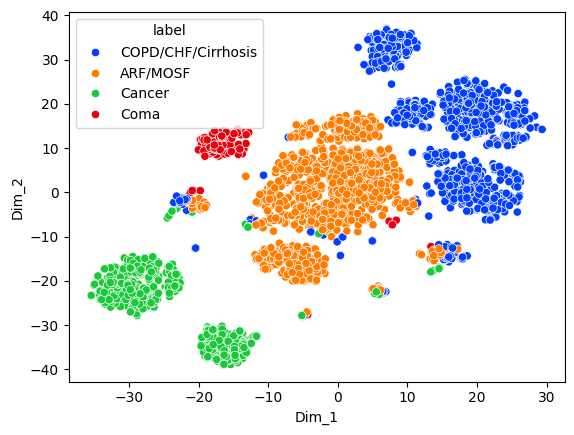

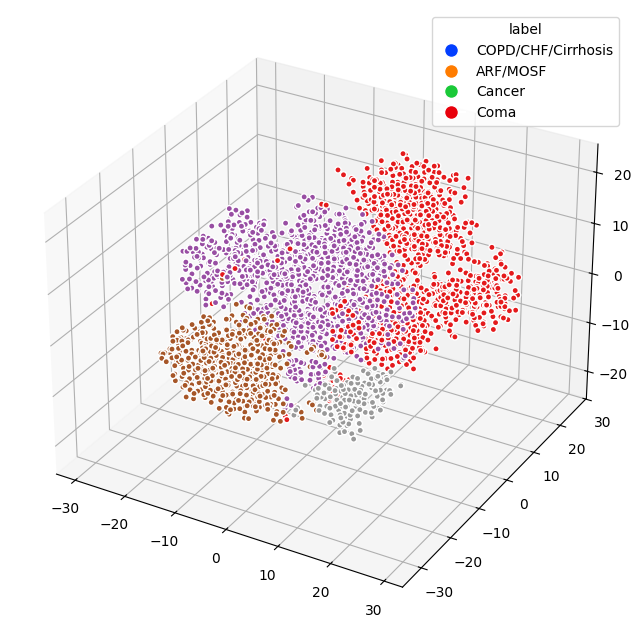

In [41]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
df = data_no_low_importance
def t_sne_plotting(col):
    target_col = df[col]
    
    # Drop target columns and one-hot encoded columns related to the label
    cols_to_drop = target_cols + [c for c in df.columns if c.startswith(col + '_')]
    reduced_df = df.drop(columns=cols_to_drop)

    # 2D t-SNE plot
    np.random.seed(3407)
    indexes = np.random.choice(reduced_df.index, size=3000, replace=False)
    data_1000 = reduced_df.loc[indexes]
    labels_1000 = target_col.loc[indexes]
    
    scaler = StandardScaler()
    # Select only numeric columns for scaling
    numeric_cols = data_1000.select_dtypes(include=np.number).columns
    scaled_data = scaler.fit_transform(data_1000[numeric_cols])
    
    tsne = TSNE(n_components=2, perplexity=100, random_state=3407, max_iter=1000)
    tsne_result = tsne.fit_transform(scaled_data)
    tsne_df = pd.DataFrame(data=tsne_result, columns=["Dim_1", "Dim_2"])

    # Handle label mapping
    if col in map_information['nominal']:
        # For one-hot encoded nominal features, the labels are the original strings
        labels = labels_1000.values
    elif col in map_information['ordinal']:
        # For ordinal features, map encoded values back to original labels
        label_map = map_information['ordinal'].get(col, {})
        labels = [label_map.get(int(l), "unknown") for l in labels_1000.values]
    else:
        # For binary features
        label_map = {1: 'True_'+col, 0: 'False_'+col}
        labels = [label_map.get(l, "unknown") for l in labels_1000.values]
        
    tsne_df["label"] = labels

    sns.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2',
                hue='label', palette="bright")
    plt.show()
    
    # 3D t-SNE plot
    tsne_3D = TSNE(n_components=3, perplexity=100, random_state=3407, max_iter=1000)
    tsne_result_3D = tsne_3D.fit_transform(scaled_data)
    tsne_df_3D = pd.DataFrame(data=tsne_result_3D, columns=["Dim_1", "Dim_2", "Dim_3"])
    tsne_df_3D["label"] = labels

    # Map string labels to integers for coloring
    unique_labels = tsne_df_3D["label"].unique()
    label_to_int = {label: idx for idx, label in enumerate(unique_labels)}
    tsne_df_3D["label_int"] = tsne_df_3D["label"].map(label_to_int)

    from matplotlib.colors import ListedColormap, BoundaryNorm

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Create a ListedColormap for consistent color mapping
    cmap = plt.get_cmap("Set1", len(unique_labels))
    norm = BoundaryNorm(range(len(unique_labels) + 1), cmap.N)

    scatter = ax.scatter(
        tsne_df_3D["Dim_1"], tsne_df_3D["Dim_2"], tsne_df_3D["Dim_3"],
        c=tsne_df_3D["label_int"], cmap=cmap, norm=norm, alpha=1, edgecolors='white'
    )

    # Create legend with matching colors
    # Create a ListedColormap from a seaborn palette for brighter colors
    bright_palette = sns.color_palette("bright", len(unique_labels))
    cmap = ListedColormap(bright_palette)
    
    handles = [
        plt.Line2D([0], [0], marker='o', color='w', label=label,
                   markerfacecolor=cmap(label_to_int[label]), markersize=10) for label in unique_labels
    ]
    ax.legend(handles=handles, title="label")
    plt.show()

t_sne_plotting('dzclass')

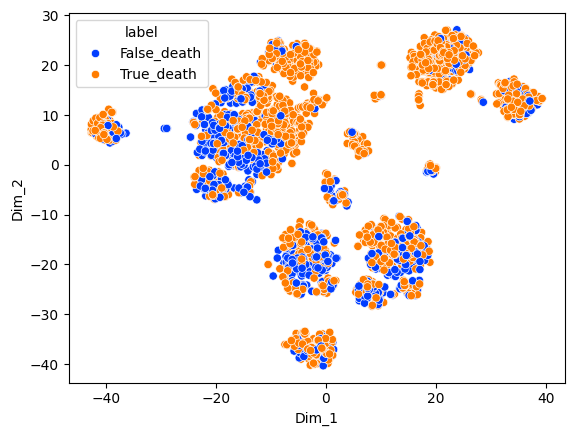

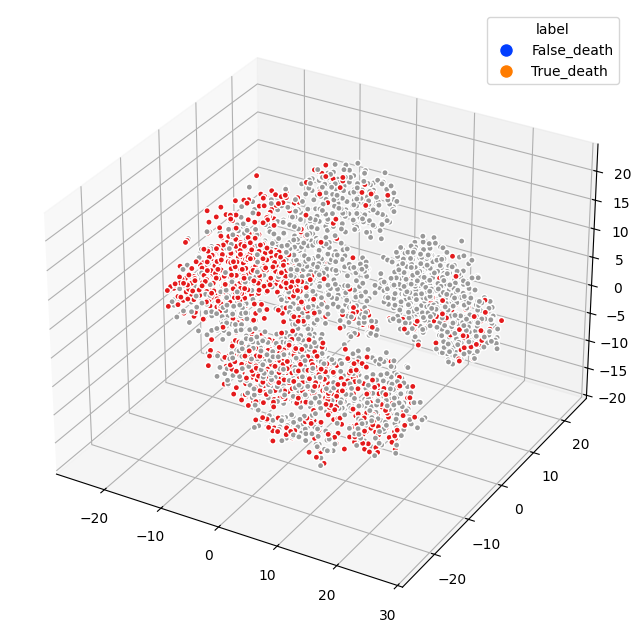

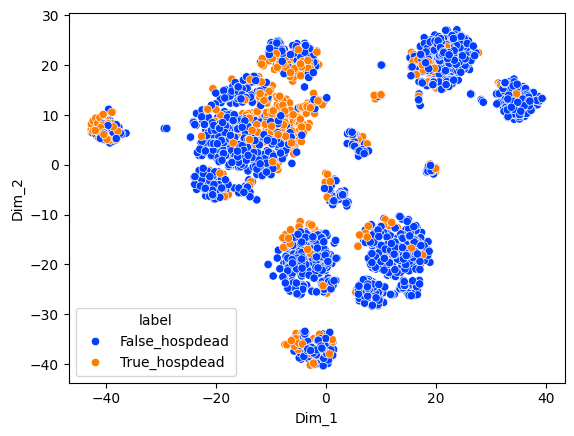

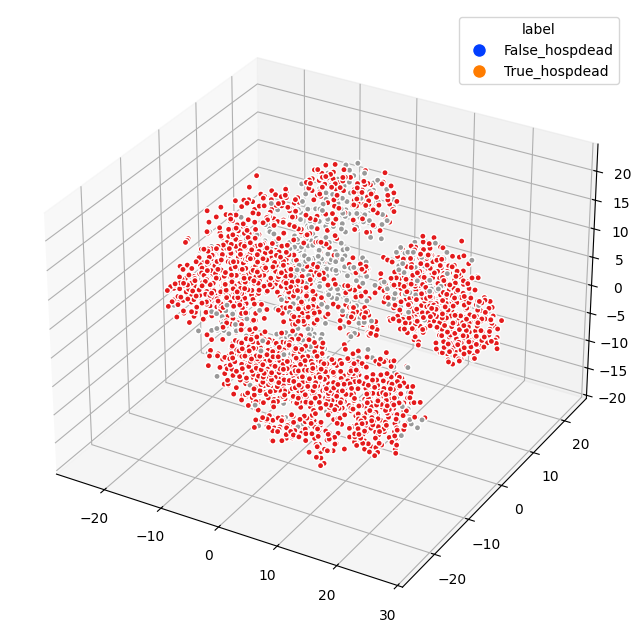

In [42]:
t_sne_plotting('death')
t_sne_plotting('hospdead')

In [41]:
# Clustering Analysis
df = data_no_low_importance
df.to_csv("preprocessed_data.csv",index=False)

In [43]:
new_df = df.copy()
# drop categorical columns
cat_cols = new_df.select_dtypes(include=['object', 'category']).columns
new_df.drop(columns=cat_cols, inplace=True)
new_df.to_csv("preprocessed_data_numeric.csv", index=False)

In [45]:
map_information_df = pd.DataFrame.from_dict(map_information, orient='index').T
map_information_df.to_csv("map_information.csv", index=False)

# Prediction: Training and Testing

## Logistics Regression

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import mutual_info_classif
from sklearn.utils.class_weight import compute_class_weight
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import os
from matplotlib.gridspec import GridSpec

# 安全读取数据
try:
    df = pd.read_csv('preprocessed_data.csv')
    print("Dataset read successfully! Length of dataset:", len(df))
except Exception as e:
    print("Error reading the CSV file:", e)
    exit()

target = 'death'

X = df.drop(columns=[target])
y = df[target]

# 去除可能导致标签泄露的列
leakage_cols = ['hospdead', 'dnrday', 'totcst', 'totmcst', 'charges', 
                'totcst_log', 'totmcst_log', 'hday', 'long_term_diff', 
                'short_term_diff', 'surv2m', 'dnr', 'prg6m']
X = X.drop(columns=leakage_cols, errors='ignore')

# 目标变量类型转换
if y.dtype == object:
    y = y.astype('category').cat.codes
elif len(y.unique()) == 2:
    y = y.astype(int)

print(f"\nTarget variable '{target}' distribution:\n{y.value_counts(normalize=True)}")

# 模型训练 --------------------------------------------------------
print("\n=== 模型训练 ===")
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# )
non_numeric_cols = X.select_dtypes(include=['object', 'category']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
# 创建列转换器
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(drop='first'), non_numeric_cols)
    ])
preprocessor.fit(X)
# 然后拆分数据集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# 应用预处理
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression(random_state=42, max_iter=10000, tol=1e-4))
])

print(f"\nTraining set: {X_train.shape}, Test set: {X_test.shape}")
print(f"Train class distribution: {np.bincount(y_train)}")
print(f"Test class distribution: {np.bincount(y_test)}")

# 类别权重
classes = np.unique(y_train)
weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))

# 创建处理管道
pipeline = Pipeline([
    ('clf', LogisticRegression(
        random_state=42, 
        max_iter=5000,
        # max_iter=500,  # 限制最大迭代次数
        tol=1e-4
    ))
])

# 优化超参数网格
param_grid = [
    {
        'clf__penalty': ['l1', 'l2'],
        'clf__C': np.logspace(-3, 2, 6),
        'clf__solver': ['saga'],
        'clf__class_weight': [class_weights, 'balanced']
    },
    {
        'clf__penalty': ['elasticnet'],
        'clf__C': np.logspace(-3, 2, 6),
        'clf__solver': ['saga'],
        # 'clf__class_weight': [None, class_weights],
        'clf__class_weight': [class_weights, 'balanced'],
        'clf__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
        # 'clf__l1_ratio': [0.1, 0.3]
    }
]

# 网格搜索优化
print("\nStarting grid search...")
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    # scoring='f1_weighted',
    scoring='f1_macro', # 使用宏平均F1分数，更关注少数类
    # cv=3,
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)
print("Hyperparameter search completed!")

# 评估最佳模型
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_

print("\n=== Best Model ===")
print(f"Best params: {best_params}")
print(f"Best CV F1: {best_score:.4f}")

# 模型在训练集上的评估
y_train_pred = best_model.predict(X_train)
y_train_proba = best_model.predict_proba(X_train)[:, 1]

print("\n=== Train Performance ===")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Train AUC: {roc_auc_score(y_train, y_train_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_train, y_train_pred))

# 测试集评估
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("\n=== Test Performance ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 可视化结果 --------------------------------------------------------
import os
from matplotlib.gridspec import GridSpec
from sklearn.metrics import precision_recall_curve, auc, f1_score, precision_score, recall_score

# 创建目录保存所有图表
os.makedirs('Logistics_Reg_model_visualizations', exist_ok=True)

# 1. 训练集混淆矩阵
plt.figure(figsize=(10, 8))
cm_train = confusion_matrix(y_train, y_train_pred)
cm_train_normalized = cm_train.astype('float') / cm_train.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_train_normalized, annot=True, fmt=".2f", cmap='Blues', 
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix (Train Set)')
plt.savefig('Logistics_Reg_model_visualizations/confusion_matrix_train.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. 测试集混淆矩阵
plt.figure(figsize=(10, 8))
cm_test = confusion_matrix(y_test, y_pred)
cm_test_normalized = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_test_normalized, annot=True, fmt=".2f", cmap='Blues', 
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix (Test Set)')
plt.savefig('Logistics_Reg_model_visualizations/confusion_matrix_test.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. 整个数据集混淆矩阵
# 在整个数据集上评估模型
X_full = preprocessor.transform(X)
y_full_pred = best_model.predict(X_full)
y_full = y
plt.figure(figsize=(10, 8))
cm_full = confusion_matrix(y_full, y_full_pred)
cm_full_normalized = cm_full.astype('float') / cm_full.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_full_normalized, annot=True, fmt=".2f", cmap='Blues', 
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix (Full Dataset)')
plt.savefig('Logistics_Reg_model_visualizations/confusion_matrix_full.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. ROC曲线和PR曲线
plt.figure(figsize=(12, 10))

# ROC曲线
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.subplot(2, 1, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# PR曲线
precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)
plt.subplot(2, 1, 2)
plt.plot(recall, precision, color='darkgreen', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve')
plt.legend(loc="upper right")

plt.tight_layout()
plt.savefig('Logistics_Reg_model_visualizations/roc_pr_curves.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. 特征重要性
plt.figure(figsize=(12, 8))
clf = best_model.named_steps['clf']

try:
    # 尝试获取预处理后的特征名称
    feature_names = preprocessor.get_feature_names_out()
except AttributeError:
    # 如果预处理没有get_feature_names_out方法
    try:
        # 尝试从ColumnTransformer获取
        feature_names = []
        for name, transformer, features in preprocessor.transformers_:
            if transformer == 'passthrough':
                feature_names.extend(features)
            elif hasattr(transformer, 'get_feature_names_out'):
                feature_names.extend(transformer.get_feature_names_out(features))
            else:
                feature_names.extend(features)
    except:
        # 最后手段：使用数字索引
        n_features = clf.coef_.shape[1]
        feature_names = [f"Feature_{i}" for i in range(n_features)]

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(clf.coef_[0])
}).sort_values('Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Feature Importances (Absolute Coefficient Value)')
plt.xlabel('Absolute Coefficient Value')
plt.savefig('Logistics_Reg_model_visualizations/feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# 6. 超参数调节曲线
if hasattr(grid_search, 'cv_results_'):
    cv_results = pd.DataFrame(grid_search.cv_results_)

    # 提取重要参数和得分
    param_cols = [col for col in cv_results.columns if col.startswith('param_')]
    plot_data = cv_results[param_cols + ['mean_test_score']].copy()

    # 将不可哈希的 dict 转换为字符串
    for col in plot_data.columns:
        if plot_data[col].dtype == object:
            plot_data[col] = plot_data[col].astype(str)

    # 绘制不同参数组合的得分
    plt.figure(figsize=(15, 10))

    # 创建网格布局
    gs = GridSpec(2, 2, figure=plt.gcf())

    # 1. C参数与得分
    ax1 = plt.subplot(gs[0, 0])
    sns.boxplot(x='param_clf__C', y='mean_test_score', data=plot_data, ax=ax1)
    ax1.set_title('C Parameter vs F1 Score')
    ax1.set_xlabel('C Value (log scale)')
    ax1.set_ylabel('Mean F1 Score')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

    # 2. 惩罚类型与得分
    ax2 = plt.subplot(gs[0, 1])
    sns.boxplot(x='param_clf__penalty', y='mean_test_score', data=plot_data, ax=ax2)
    ax2.set_title('Penalty Type vs F1 Score')
    ax2.set_xlabel('Penalty Type')
    ax2.set_ylabel('Mean F1 Score')

    # 3. 类别权重与得分（现在可以安全绘图）
    ax3 = plt.subplot(gs[1, :])
    sns.boxplot(x='param_clf__class_weight', y='mean_test_score', data=plot_data, ax=ax3)
    ax3.set_title('Class Weight vs F1 Score')
    ax3.set_xlabel('Class Weight Strategy')
    ax3.set_ylabel('Mean F1 Score')

    plt.tight_layout()
    plt.savefig('Logistics_Reg_model_visualizations/hyperparameter_tuning.png', dpi=300, bbox_inches='tight')
    plt.show()

# 7. 评估指标表格
# 计算各项指标
train_metrics = {
    'Dataset': 'Train',
    'Accuracy': accuracy_score(y_train, y_train_pred),
    'Precision': precision_score(y_train, y_train_pred, average='macro'),
    'Recall': recall_score(y_train, y_train_pred, average='macro'),
    'F1': f1_score(y_train, y_train_pred, average='macro'),
    'AUC': roc_auc_score(y_train, y_train_proba)
}

test_metrics = {
    'Dataset': 'Test',
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, average='macro'),
    'Recall': recall_score(y_test, y_pred, average='macro'),
    'F1': f1_score(y_test, y_pred, average='macro'),
    'AUC': roc_auc_score(y_test, y_proba)
}

# 创建表格
metrics_df = pd.DataFrame([train_metrics, test_metrics])
metrics_df = metrics_df.round(4)

# 保存为CSV
metrics_df.to_csv('Logistics_Reg_model_visualizations/evaluation_metrics.csv', index=False)

# 可视化表格
plt.figure(figsize=(10, 4))
ax = plt.subplot(111, frame_on=False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

table = pd.plotting.table(ax, metrics_df, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.title('Model Evaluation Metrics', y=1.1)
plt.savefig('Logistics_Reg_model_visualizations/evaluation_metrics_table.png', dpi=300, bbox_inches='tight')
plt.show()

# 保存结果
joblib.dump(best_model, 'best_logistic_model.pkl')
feature_importance.to_csv('feature_importance.csv', index=False)
print("\nModel saved as 'best_logistic_model.pkl'")
print("Feature importance saved as 'feature_importance.csv'")
print("All visualizations saved in 'Logistics_Reg_model_visualizations' directory")

## Ensemble Learning
In this part, we tried 6 kinds of different ensemble learning.
* 

In [ ]:
from matplotlib.gridspec import GridSpec
import numpy as np
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_recall_curve, auc
from sklearn.utils.class_weight import compute_class_weight, compute_sample_weight
from sklearn.metrics import roc_auc_score, precision_score, recall_score
import os
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from imblearn.ensemble import BalancedRandomForestClassifier, RUSBoostClassifier
from collections import Counter
import time
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# 配置设置
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

# 定义评估函数 --------------------------------------------------------
def evaluate_model(model, X_test, y_test, model_name):
    try:
        # 尝试使用预测概率进行阈值调整
        y_proba = model.predict_proba(X_test)
        y_pred = adjust_threshold(y_proba, y_test)  # 修改为传入真实标签用于识别少数类
    except:
        # 如果模型不支持概率预测，使用默认预测
        y_pred = model.predict(X_test)
    
    print(f"\n{'='*50}")
    print(f"{model_name} evaluation:")
    print('-'*50)
    print("accuracy:", accuracy_score(y_test, y_pred))
    print("Weighted F1 score:", f1_score(y_test, y_pred, average='weighted'))
    print("Macro average F1 score:", f1_score(y_test, y_pred, average='macro'))
    
    # 添加少数类F1分数
    unique_classes = np.unique(y_test)
    for cls in unique_classes:
        cls_f1 = f1_score(y_test, y_pred, labels=[cls], average=None)[0]
        print(f"Class {cls} F1 score: {cls_f1:.4f}")

    print("\nClassification report:")
    print(classification_report(y_test, y_pred, digits=3))
    
    # 创建模型专属目录保存所有图表
    model_dir = f"ensemble_model_visualizations/{model_name.replace(' ', '_')}"
    os.makedirs(model_dir, exist_ok=True)
    
    # 1. 训练集混淆矩阵
    plt.figure(figsize=(10, 8))
    cm_train = confusion_matrix(y_train, model.predict(X_train))
    cm_train_normalized = cm_train.astype('float') / cm_train.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_train_normalized, annot=True, fmt=".2f", cmap='Blues', 
                xticklabels=np.unique(y_train), 
                yticklabels=np.unique(y_train))
    plt.title(f'{model_name} Confusion Matrix (Train Set)')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.savefig(f'{model_dir}/confusion_matrix_train.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    # 2. 测试集混淆矩阵
    plt.figure(figsize=(10, 8))
    cm_test = confusion_matrix(y_test, y_pred)
    cm_test_normalized = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_test_normalized, annot=True, fmt=".2f", cmap='Blues', 
                xticklabels=np.unique(y_test), 
                yticklabels=np.unique(y_test))
    plt.title(f'{model_name} Confusion Matrix (Test Set)')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.savefig(f'{model_dir}/confusion_matrix_test.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    # 3. 整个数据集混淆矩阵
    plt.figure(figsize=(10, 8))
    X_full = preprocessor.transform(X)
    y_full_pred = model.predict(X_full)
    cm_full = confusion_matrix(y, y_full_pred)
    cm_full_normalized = cm_full.astype('float') / cm_full.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_full_normalized, annot=True, fmt=".2f", cmap='Blues', 
                xticklabels=np.unique(y), 
                yticklabels=np.unique(y))
    plt.title(f'{model_name} Confusion Matrix (Full Dataset)')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.savefig(f'{model_dir}/confusion_matrix_full.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    # 4. PR曲线
    if hasattr(model, 'predict_proba'):
        plot_pr_curves(model, X_test, y_test, model_name, model_dir)
    
    # 5. 评估指标表格
    # 计算各项指标
    train_metrics = {
        'Dataset': 'Train',
        'Accuracy': accuracy_score(y_train, model.predict(X_train)),
        'Precision': precision_score(y_train, model.predict(X_train), average='macro'),
        'Recall': recall_score(y_train, model.predict(X_train), average='macro'),
        'F1': f1_score(y_train, model.predict(X_train), average='macro'),
        'AUC': roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]) if hasattr(model, 'predict_proba') else np.nan
    }

    test_metrics = {
        'Dataset': 'Test',
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro'),
        'Recall': recall_score(y_test, y_pred, average='macro'),
        'F1': f1_score(y_test, y_pred, average='macro'),
        'AUC': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) if hasattr(model, 'predict_proba') else np.nan
    }

    # 创建表格
    metrics_df = pd.DataFrame([train_metrics, test_metrics])
    metrics_df = metrics_df.round(4)

    # 保存为CSV
    metrics_df.to_csv(f'{model_dir}/evaluation_metrics.csv', index=False)

    # 可视化表格
    plt.figure(figsize=(10, 4))
    ax = plt.subplot(111, frame_on=False)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

    table = pd.plotting.table(ax, metrics_df, loc='center', cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)

    plt.title(f'{model_name} Evaluation Metrics', y=1.1)
    plt.savefig(f'{model_dir}/evaluation_metrics_table.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    return y_pred

def plot_pr_curves(model, X_test, y_test, model_name, model_dir):
    try:
        y_proba = model.predict_proba(X_test)
        n_classes = len(np.unique(y_test))
        
        plt.figure(figsize=(10, 8))
        for i in range(n_classes):
            # 二值化当前类
            y_true_class = (y_test == i).astype(int)
            y_score_class = y_proba[:, i]
            
            precision, recall, _ = precision_recall_curve(y_true_class, y_score_class)
            pr_auc = auc(recall, precision)
            
            plt.plot(recall, precision, lw=2, 
                     label=f'Class {i} (AUC = {pr_auc:.2f})')
        
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'{model_name} Precision-Recall Curve')
        plt.legend(loc='best')
        plt.grid(True)
        plt.savefig(f'{model_dir}/pr_curve.png', dpi=300, bbox_inches='tight')
        plt.close()
    except Exception as e:
        print(f"Could not plot PR curves for {model_name}: {str(e)}")

def optimize_model(model, param_grid, X_train, y_train, cv=3):
    """使用网格搜索优化模型超参数，并稳健绘制超参数曲线"""
    print(f"\nOptimizing {model.__class__.__name__}...")
    start_time = time.time()

    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='f1_weighted',
        cv=StratifiedKFold(n_splits=cv, shuffle=True, random_state=42),
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train, y_train)

    end_time = time.time()
    print(f"Optimization completed in {end_time - start_time:.2f} seconds")
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best F1 score: {grid_search.best_score_:.4f}")

    # 保存超参数调节曲线（健壮版）
    if hasattr(grid_search, 'cv_results_'):
        cv_results = pd.DataFrame(grid_search.cv_results_)

        # 提取参数列
        param_cols = [c for c in cv_results.columns if c.startswith('param_')]
        plot_data = cv_results[param_cols + ['mean_test_score']].copy()

        # 将不可哈希类型转为字符串
        for col in param_cols:
            plot_data[col] = plot_data[col].astype(str)

        # 创建目录
        model_name = model.__class__.__name__
        model_dir = f"ensemble_model_visualizations/{model_name.replace(' ', '_')}"
        os.makedirs(model_dir, exist_ok=True)

        # 绘图参数映射
        plot_configs = [
            ('n_estimators', 'Number of Estimators'),
            ('learning_rate', 'Learning Rate'),
            ('max_depth', 'Max Depth'),
            ('reg_alpha', 'Regularization Alpha'),
        ]

        # 只绘制存在的参数
        valid_plots = [(key, title) for key, title in plot_configs if f'param_{key}' in plot_data.columns]

        if not valid_plots:
            print("⚠️ 无可视化参数列，跳过超参数绘图。")
            return grid_search.best_estimator_

        # 创建子图
        n_plots = len(valid_plots)
        fig, axes = plt.subplots(1, n_plots, figsize=(5 * n_plots, 5))
        if n_plots == 1:
            axes = [axes]

        for ax, (key, title) in zip(axes, valid_plots):
            sns.boxplot(
                x=f'param_{key}',
                y='mean_test_score',
                data=plot_data,
                ax=ax
            )
            ax.set_title(f'{title} vs F1 Score')
            ax.set_xlabel(title)
            ax.set_ylabel('Mean F1 Score')
            ax.tick_params(axis='x', rotation=45)

        plt.tight_layout()
        plt.savefig(f'{model_dir}/hyperparameter_tuning.png', dpi=300, bbox_inches='tight')
        plt.close()
        print(f"超参数可视化已保存：{model_dir}/hyperparameter_tuning.png")

    return grid_search.best_estimator_


def adjust_threshold(y_proba, y_true):
    """根据类别分布调整决策阈值"""
    # 从真实标签中识别少数类
    class_counts = np.bincount(y_true)
    minority_class = np.argmin(class_counts)
    n_classes = len(np.unique(y_true))
    
    # 设置阈值 - 对少数类使用更低的阈值
    thresholds = np.full(n_classes, 0.5)
    thresholds[minority_class] = 0.2  # 降低少数类的阈值
    
    # 应用阈值
    y_pred = np.argmax(y_proba, axis=1)
    max_proba = np.max(y_proba, axis=1)
    
    for i in range(n_classes):
        # 找到低置信度样本
        low_confidence_idx = np.where(max_proba < thresholds[i])[0]
        
        # 找到高置信度样本
        high_confidence_idx = np.where(
            (y_pred == i) & (y_proba[:, i] >= thresholds[i])
        )[0]
        
        # 只保留高置信度的预测
        mask = np.isin(np.arange(len(y_pred)), high_confidence_idx)
        y_pred[~mask] = -1  # 标记低置信度预测
    
    # 处理低置信度预测：分配到概率最高的类
    low_conf_idx = np.where(y_pred == -1)[0]
    if len(low_conf_idx) > 0:
        y_pred[low_conf_idx] = np.argmax(y_proba[low_conf_idx], axis=1)
    
    return y_pred

def weighted_ensemble_predict(models, weights, X):
    """加权融合多个模型的预测概率"""
    probas = []
    for (name, model), weight in zip(models.items(), weights):
        try:
            proba = model.predict_proba(X) * weight
            probas.append(proba)
        except:
            print(f"Model {name} does not support predict_proba, skipping.")
    
    if len(probas) == 0:
        raise ValueError("No models support probability prediction.")
    
    avg_proba = np.mean(probas, axis=0)
    return np.argmax(avg_proba, axis=1)

# 安全读取数据
try:
    df = pd.read_csv('preprocessed_data.csv')
    print("Dataset read successfully! Length of dataset:", len(df))
except Exception as e:
    print("Error reading the CSV file:", e)
    exit()

target = 'death'

X = df.drop(columns=[target])
y = df[target]

# 去除可能导致标签泄露的列
leakage_cols = ['hospdead', 'dnrday', 'totcst', 'totmcst', 'charges', 
                'totcst_log', 'totmcst_log', 'hday', 'long_term_diff', 
                'short_term_diff', 'surv2m', 'dnr', 'prg6m']
X = X.drop(columns=leakage_cols, errors='ignore')

# 目标变量类型转换
if y.dtype == object:
    y = y.astype('category').cat.codes
elif len(y.unique()) == 2:
    y = y.astype(int)

# 检查类别数量
n_classes = len(np.unique(y))
print(f"\nTarget '{target}' has {n_classes} classes after merging and encoding")
print("Class distribution:", Counter(y))

print(f"\nTarget variable '{target}' distribution:\n{y.value_counts(normalize=True)}")

# 模型训练 --------------------------------------------------------
print("\n=== 模型训练 ===")
non_numeric_cols = X.select_dtypes(include=['object', 'category']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
# 创建列转换器
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(drop='first'), non_numeric_cols)
    ])
preprocessor.fit(X)
# 然后拆分数据集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# 应用预处理
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

# # 计算类别权重
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))
print(f"Class weights: {class_weight_dict}")

# 使用ADASYN
oversampler = ADASYN(
    sampling_strategy='auto',
    n_neighbors=5,
    random_state=42
)

X_train_res, y_train_res = oversampler.fit_resample(X_train, y_train)
print("After ADASYN - Train set distribution:", Counter(y_train_res))

# 计算样本权重
sample_weights = compute_sample_weight('balanced', y_train_res)

# 模型集合
models = {}
training_times = {}

# Balanced Random Forest----------------------------------------------
print("\nTraining Balanced Random Forest...")
start_time = time.time()
brf = BalancedRandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    sampling_strategy='auto',
    replacement=True,
    random_state=42,
    n_jobs=-1
)
brf.fit(X_train_res, y_train_res)
training_times['Balanced RF'] = time.time() - start_time
models['Balanced RF'] = brf
print(f"Balanced RF training completed in {training_times['Balanced RF']:.2f} seconds")

# RUSBoost----------------------------------------------
print("\nTraining RUSBoost...")
start_time = time.time()
rusboost = RUSBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=5),
    n_estimators=300,
    learning_rate=0.05,
    sampling_strategy='auto',
    random_state=42,
    algorithm='SAMME'  # 修复参数错误
)
rusboost.fit(X_train_res, y_train_res)
training_times['RUSBoost'] = time.time() - start_time
models['RUSBoost'] = rusboost
print(f"RUSBoost training completed in {training_times['RUSBoost']:.2f} seconds")

# XGBoost with hyperparameter optimization and class weights----------------------------------------------
print("\nOptimizing XGBoost with class weights...")
start_time = time.time()
# 计算少数类权重比例
scale_pos_weight = class_weights[1] / class_weights[0]  # 少数类权重 / 多数类权重

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic' if n_classes == 2 else 'multi:softmax',
    num_class=n_classes if n_classes > 2 else None,
    eval_metric='logloss' if n_classes == 2 else 'merror',
    scale_pos_weight=scale_pos_weight if n_classes == 2 else None,
    random_state=42,
    n_jobs=-1
)

# XGBoost参数网格 
xgb_param_grid = {
    'n_estimators': [150, 200, 300, 350],
    'learning_rate': [0.05, 0.1, 0.01],
    'max_depth': [4, 6],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.7, 0.8],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [0.5, 1]
}

# 优化XGBoost
best_xgb = optimize_model(xgb_model, xgb_param_grid, X_train_res, y_train_res)
models['Optimized XGBoost'] = best_xgb
training_times['Optimized XGBoost'] = time.time() - start_time

# Bagging with optimized base estimator----------------------------------------------
print("\nTraining Bagging Classifier...")
start_time = time.time()
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(
        class_weight='balanced', 
        max_depth=8,
        min_samples_split=10,
        min_samples_leaf=5
    ),
    n_estimators=300,
    max_samples=0.8,
    max_features=0.8,
    random_state=42,
    n_jobs=-1
)
bagging.fit(X_train_res, y_train_res)
training_times['Bagging'] = time.time() - start_time
models['Bagging'] = bagging
print(f"Bagging training completed in {training_times['Bagging']:.2f} seconds")

# Gradient Boosting with class weights----------------------------------------------
print("\nTraining Gradient Boosting...")
start_time = time.time()
gb = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.1,
    max_depth=4,
    min_samples_leaf=10,
    subsample=0.8,
    random_state=42
)
gb.fit(X_train_res, y_train_res, sample_weight=sample_weights)
training_times['Gradient Boosting'] = time.time() - start_time
models['Gradient Boosting'] = gb
print(f"Gradient Boosting training completed in {training_times['Gradient Boosting']:.2f} seconds")

# Stacking集成 - 使用表现最好的模型作为基学习器----------------------------------------------
print("\nTraining Stacking Ensemble...")
start_time = time.time()

# 选择表现最好的三个模型作为基学习器
base_learners = [
    ('brf', BalancedRandomForestClassifier(n_estimators=300, max_depth=10)),
    ('gb', GradientBoostingClassifier(n_estimators=250, learning_rate=0.05)),
    ('xgb', best_xgb)
]

# 添加元学习器
stacker = StackingClassifier(
    estimators=base_learners,
    final_estimator=LogisticRegression(class_weight='balanced', max_iter=2000),
    cv=5,
    n_jobs=-1
)

stacker.fit(X_train_res, y_train_res)
training_times['Stacking'] = time.time() - start_time
models['Stacking'] = stacker
print(f"Stacking training completed in {training_times['Stacking']:.2f} seconds")

# 评估所有模型
print("\nEvaluating all models...")
print("=" * 60)
results = {}
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    start_time = time.time()
    y_pred = evaluate_model(model, X_test, y_test, name)
    eval_time = time.time() - start_time
    
    # 收集评估指标
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'f1_weighted': f1_score(y_test, y_pred, average='weighted'),
        'f1_macro': f1_score(y_test, y_pred, average='macro'),
        'train_time': training_times.get(name, 'N/A'),
        'eval_time': eval_time
    }
    
    # 添加每个类别的F1分数
    for cls in np.unique(y_test):
        cls_f1 = f1_score(y_test, y_pred, labels=[cls], average=None)[0]
        results[name][f'f1_class_{cls}'] = cls_f1

# 模型比较
print("\nModel Comparison:")
print("=" * 60)
comparison = pd.DataFrame(results).T
comparison = comparison.sort_values(by='f1_weighted', ascending=False)
print(comparison)

# 特征重要性可视化
plt.figure(figsize=(15, 10))
model_names = list(models.keys())
for i, (name, model) in enumerate(models.items(), 1):
    try:
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            indices = np.argsort(importances)[::-1]
            
            plt.subplot(3, 3, i)
            plt.barh(range(10), importances[indices][:10], align='center')
            plt.yticks(range(10), [X.columns[idx] for idx in indices[:10]])
            plt.xlabel('Feature Importance')
            plt.title(f'{name} - Top 10 Features')
    except Exception as e:
        print(f"Could not get feature importances for {name}: {str(e)}")

plt.tight_layout()
plt.savefig('feature_importances.png', dpi=300)
plt.show()

# 加权融合模型预测
print("\nEvaluating Weighted Ensemble Fusion...")
# 基于验证集性能设置权重
weights = [0.25, 0.20, 0.18, 0.15, 0.12, 0.10]  # 按模型性能分配权重

# 移除Stacking模型（因为它本身已经是集成模型）
fusion_models = {k: v for k, v in models.items() if k != 'Stacking'}
fusion_weights = weights[:len(fusion_models)]

# 评估融合模型
y_pred_fused = weighted_ensemble_predict(fusion_models, fusion_weights, X_test)

# 评估融合模型性能
print("\nFused Model Evaluation:")
print("=" * 50)
print("accuracy:", accuracy_score(y_test, y_pred_fused))
print("Weighted F1 score:", f1_score(y_test, y_pred_fused, average='weighted'))
print("Macro average F1 score:", f1_score(y_test, y_pred_fused, average='macro'))

# 添加每个类别的F1分数
for cls in np.unique(y_test):
    cls_f1 = f1_score(y_test, y_pred_fused, labels=[cls], average=None)[0]
    print(f"Class {cls} F1 score: {cls_f1:.4f}")

print("\nClassification report:")
print(classification_report(y_test, y_pred_fused, digits=3))

# 保存融合模型结果到比较表
results['Weighted Fusion'] = {
    'accuracy': accuracy_score(y_test, y_pred_fused),
    'f1_weighted': f1_score(y_test, y_pred_fused, average='weighted'),
    'f1_macro': f1_score(y_test, y_pred_fused, average='macro'),
    'train_time': 'N/A',
    'eval_time': 'N/A'
}

for cls in np.unique(y_test):
    cls_f1 = f1_score(y_test, y_pred_fused, labels=[cls], average=None)[0]
    results['Weighted Fusion'][f'f1_class_{cls}'] = cls_f1

# 更新模型比较表
print("\nUpdated Model Comparison with Fusion:")
print("=" * 60)
comparison = pd.DataFrame(results).T
comparison = comparison.sort_values(by='f1_weighted', ascending=False)
print(comparison)

# 保存最佳模型
best_model_name = comparison.index[0]
best_model = models.get(best_model_name, None) or fusion_models.get(best_model_name, None)
print(f"\nBest model identified: {best_model_name} with weighted F1: {comparison.loc[best_model_name, 'f1_weighted']:.4f}")

# Evaluation and Choice of Prediction Model

# Open-Ended Exploration